In [2]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from matplotlib import ticker
from sklearn import datasets,manifold

n_samples=1500
S_points,S_color=datasets.make_s_curve(n_samples,random_state=0)

D:\conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


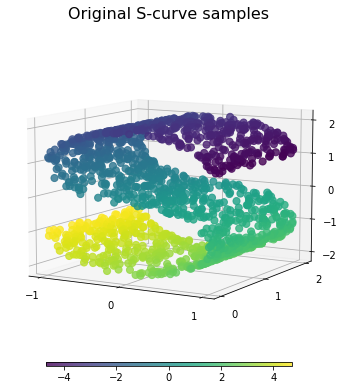

In [11]:
def plot_3d(points,points_color,title):
    x,y,z=points.T
    
    fig,ax=plt.subplots(figsize=(6,6),facecolor="white",tight_layout=True,subplot_kw={"projection":"3d"})
    fig.suptitle(title,size=16)
    col=ax.scatter(x,y,z,c=points_color,s=50,alpha=0.8)
    ax.view_init(azim=-60,elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))
    
    fig.colorbar(col,ax=ax,orientation="horizontal",shrink=0.6,aspect=60,pad=0.01)
    plt.show()

def plot_2d(points,points_color,title):
    fig,ax=plt.subplots(figsize=(3,3),facecolor="white",constrained_layout=True)
    fig.suptitle(title,size=16)
    add_2d_scatter(ax,points,points_color)
    plt.show()

def add_2d_scatter(ax,points,points_color,title=None):
    x,y=points.T
    ax.scatter(x,y,c=points_color,s=50,alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    
plot_3d(S_points,S_color,"Original S-curve samples")

In [12]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

In [13]:
params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)

lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(S_points)

lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
S_hessian = lle_hessian.fit_transform(S_points)

lle_mod = manifold.LocallyLinearEmbedding(method="modified", **params)
S_mod = lle_mod.fit_transform(S_points)

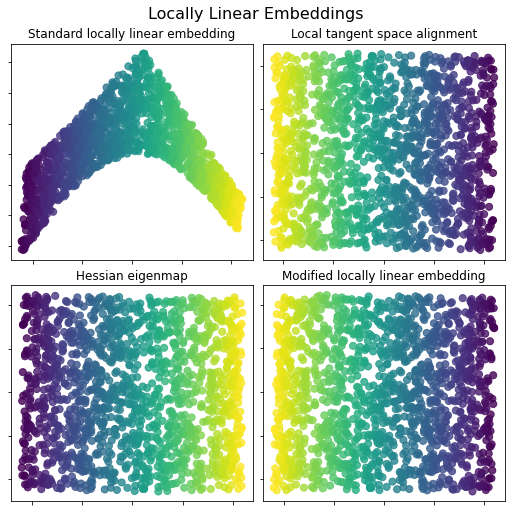

In [14]:
fig, axs = plt.subplots(
    nrows=2, ncols=2, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", S_standard),
    ("Local tangent space alignment", S_ltsa),
    ("Hessian eigenmap", S_hessian),
    ("Modified locally linear embedding", S_mod),
]
for ax, method in zip(axs.flat, lle_methods):
    name, points = method
    add_2d_scatter(ax, points, S_color, name)

plt.show()

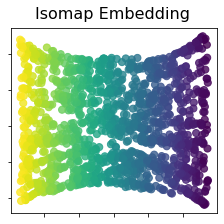

In [15]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(S_points)

plot_2d(S_isomap, S_color,"Isomap Embedding")

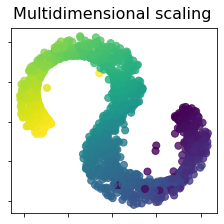

In [18]:
md_scaling = manifold.MDS(n_components=n_components,max_iter=50,n_init=4,random_state=0)
S_scaling = md_scaling.fit_transform(S_points)

plot_2d(S_scaling, S_color, "Multidimensional scaling")

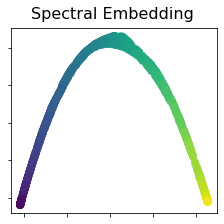

In [19]:
spectral = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors, random_state=42
)
S_spectral = spectral.fit_transform(S_points)

plot_2d(S_spectral, S_color, "Spectral Embedding")

D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


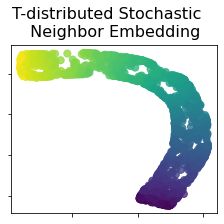

In [23]:
t_sne = manifold.TSNE(
    n_components=n_components,
    perplexity=30,
    init="random",
    n_iter=250,
    random_state=0,
)
S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")

In [9]:
# 下载数据
from sklearn.datasets import load_digits

digits = load_digits(n_class=5)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30
print(X)
print(type(X))
print(len(y))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  0. ...  9.  0.  0.]
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  0.  6. ...  6.  0.  0.]]
<class 'numpy.ndarray'>
901


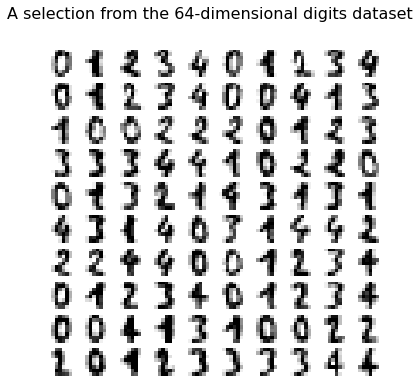

In [2]:
# 展示数据
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [3]:
import numpy as np
from matplotlib import offsetbox

from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [5]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    MDS,
    TSNE,
    Isomap,
    LocallyLinearEmbedding,
    SpectralEmbedding,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embedding": TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [6]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embedding...


D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Computing NCA embedding...


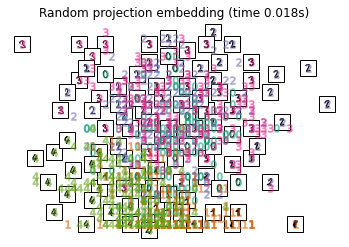

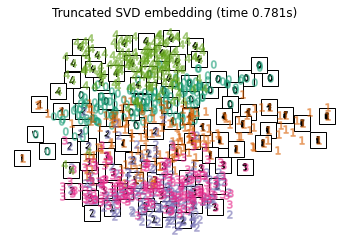

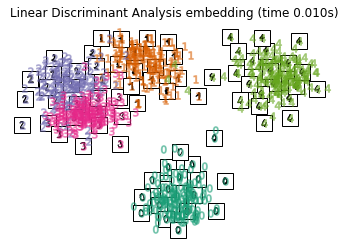

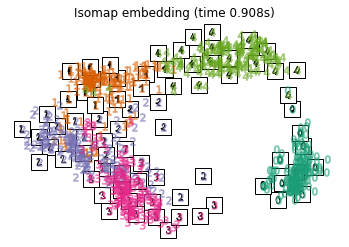

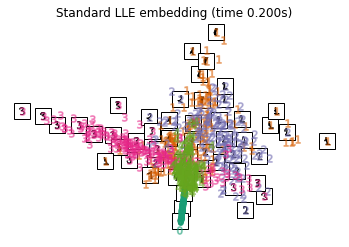

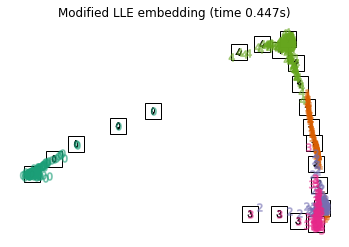

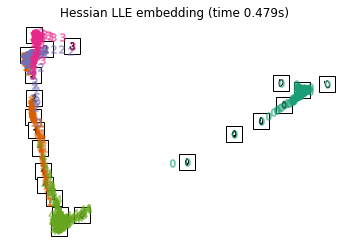

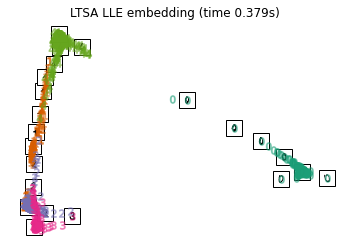

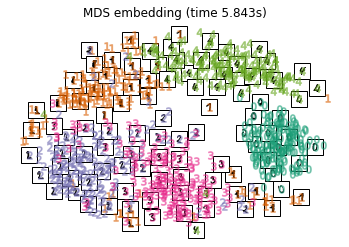

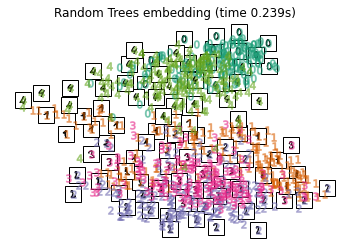

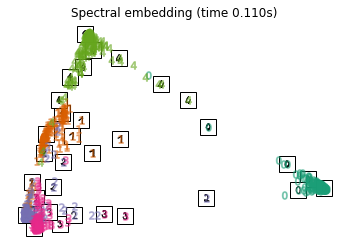

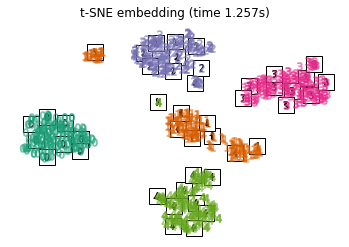

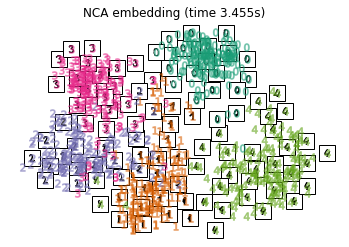

In [7]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# 使用fit_transform而不是fit，因为TSNE没有transform方法
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):     # 将数据实际绘制成文本，而不是散点
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
         color = colors[digits.target[i]],
         fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
plt.show()
